<a href="https://colab.research.google.com/github/WangariKimotho/ml_labs/blob/main/Kimotho_Lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7
---

In [20]:
use_saved_model = True #@param {type:"boolean"}


Lets take a simple 10 class image classification problem for instance. The feature maps produced after several layers of convolution usually have a height and width as the feature maps are obtained from images. Lets say the outputs have a 10 X 10 feature map. But for our problem we need a 10 X 1 output. We now have to flatten the 10 X 10 feature maps and pass through a Neural Network which has the number of output layers corresponding to the number of classes (10). In imaging context, these are referred to as linear layers.


# Figure showing a 2D Convolution over an image 

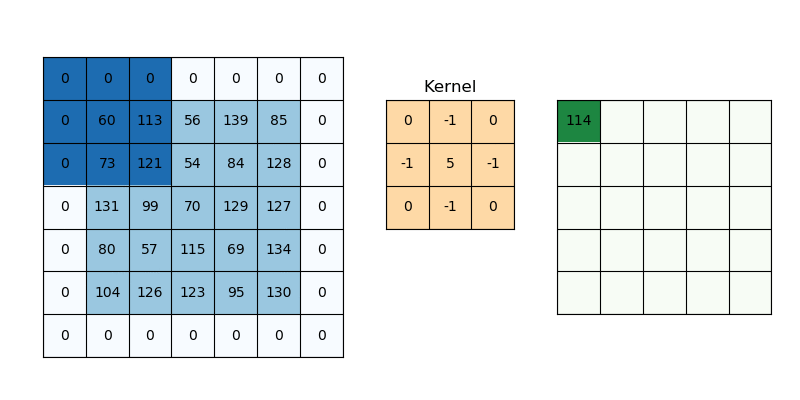

# Mount Google Drive Folder

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Mount Google drive to load the pre-trained models and data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Downloading our data set from the Google Drive



# Keras Import

In [2]:
import keras
keras.__version__

'2.6.0'

In [3]:
!cp /content/drive/MyDrive/labs_content/dogs-vs-cats.zip /content/all.zip

In [4]:
# we will focus on classifying images as "dogs" or "cats", in a dataset containing 4000 pictures of cats and dogs 
#(2000 cats, 2000 dogs). We will use 2000 pictures for training, 1000 for validation, and finally 1000 for testing.


# We have dowloaded the zip file of data, let's unzip them and populate training , test and vaidation sets

import glob
import zipfile

zip_files = glob.glob('/content/*.zip')
print(zip_files)

def extract_zip(file):
    with zipfile.ZipFile(file,"r") as zip_ref:
        zip_ref.extractall("data")
        
# extract both train and test1 zip
for files in zip_files:
    extract_zip(files)


['/content/all.zip']


In [5]:
# Looking into the zips inside our downloaded zip file
zip_files = glob.glob('/content/data/*.zip')
print(zip_files)

['/content/data/train.zip', '/content/data/test1.zip']


Extracting zips inside

In [6]:
def extract_zip(file):
    with zipfile.ZipFile(file,"r") as zip_ref:
        zip_ref.extractall(path="/content/data/", members=None, pwd=None)

# extract both train and test1 zip

extract_zip("/content/data/test1.zip")
extract_zip("/content/data/train.zip")


In [7]:
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/data/train/'

# The directory where we will
# store our smaller dataset
base_dir = '/content/data/cnn_small_data'
os.mkdir(base_dir)

# CREATING Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# CREATING Directory for our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# CREATING Directory for our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# CREATING Directory for our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# CREATING Directory for our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# CREATING Directory for our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# CREATING Directory for our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


# NOW lets populate the Train, test, Validation inside the CNN_small_data Directory




# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)

    shutil.copyfile(src, dst)
   

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
## lets look at what we got so far

print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


### BALANCED BINARY CLASSIFICATION
##So we have indeed 2000 training images, and then 1000 validation images and 1000 test images. 
#In each split, there is the same number of samples from each class: this is a balanced binary 
#classification problem, which means that classification accuracy will be an appropriate measure of success.




total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


This will be the input image we will use -- a picture of a cat, not part of images that the network was trained on

(1, 150, 150, 3)


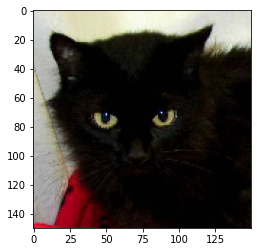

In [12]:
img_path = '/content/data/cnn_small_data/test/cats/cat.1500.jpg'

# We preprocess the image into a 4D tensor

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)


# Displaying the image

import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [13]:
## Creating the CNN model

from keras import layers
from keras import models

# constructing a sequential empty model
model = models.Sequential()

# DEPTH --> of the feature maps is progressively increasing in the network (from 32 to 128 )
# SIZE --> of the feature maps is decreasing (from 148x148 to 7x7)

# Image size of 150x150 with 3 channels . A tensor shape is [ batchSize, channel, height, Weight ]

## WHY DOING MAXPOOLING ?
#Reducing Computational Load
#Reducing Overfitting
#Max pooling is then used to reduce the spatial dimensions of the output volume.

### The second required parameter you need to provide the Keras 
#   Conv2D class is the kernel_size , a 2-tuple specifying the width and height of the 2D convolution window.
#.   First, examine your input image — is it larger than 128×128?
#.   If so, consider using a 5×5 or 7×7 kernel to learn larger features
#.   and then quickly reduce spatial dimensions — then start working with 3×3 kernels:
### total of 32 filters.

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))






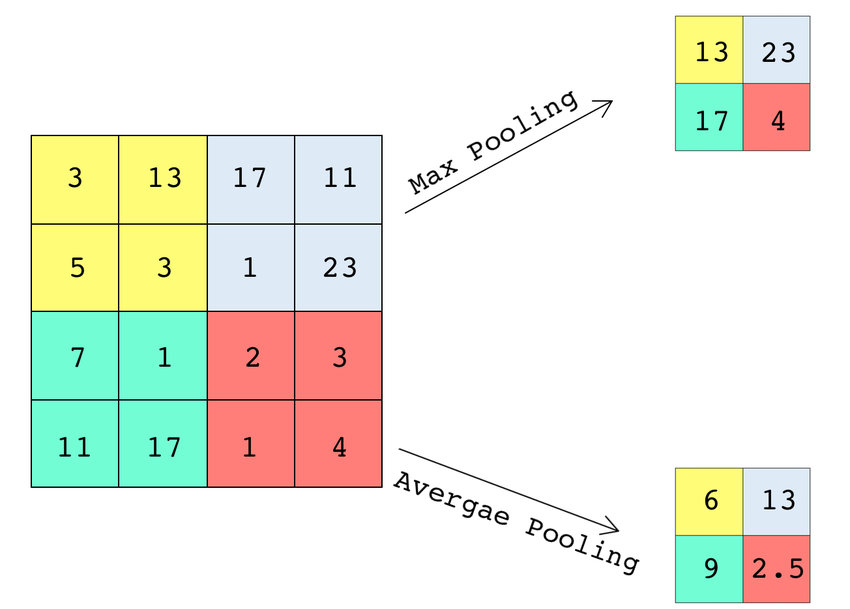

In [14]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [15]:
#For our compilation step, we'll go with the RMSprop optimizer as usual. 
#Since we ended our network with a single sigmoid unit, we will use binary crossentropy as our loss

# Binary Cross-Entropy is the Log-loss error and the followings are the mathematics behind calculating them.

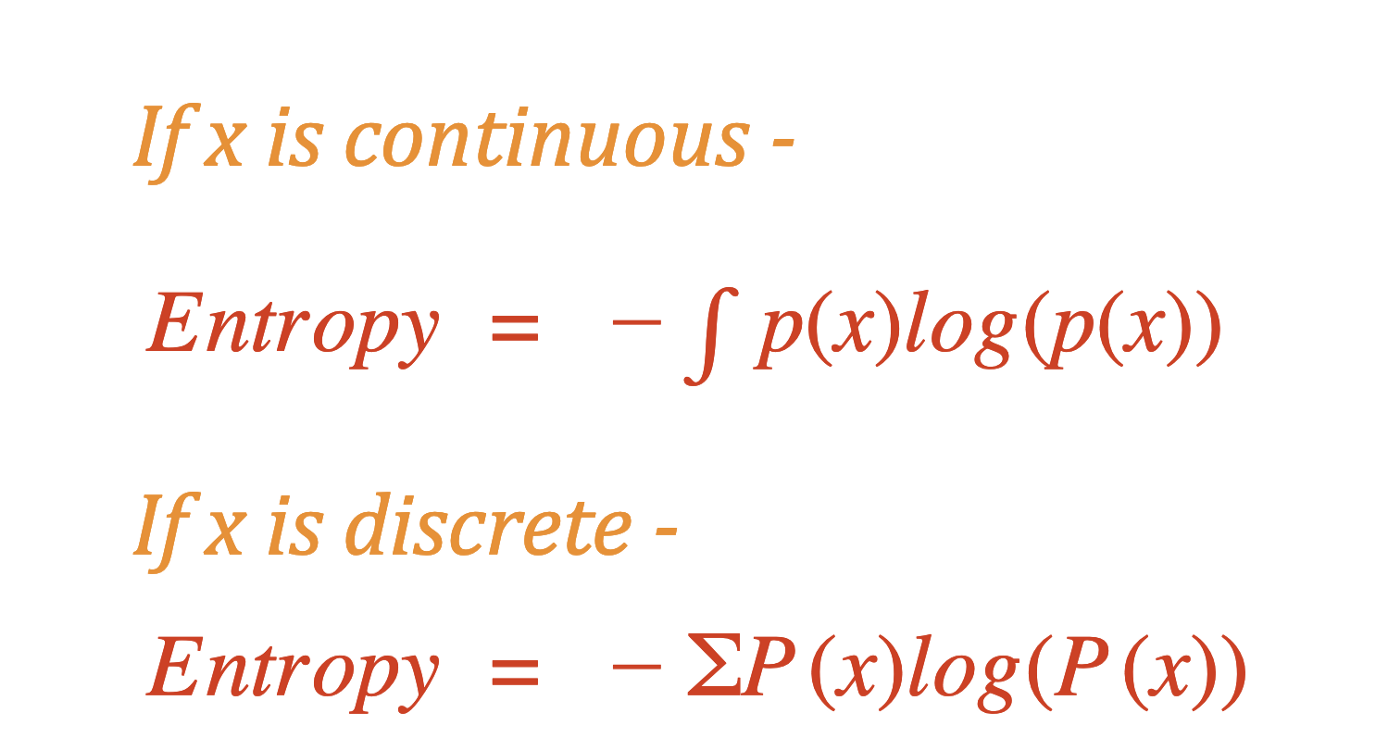

In [16]:
### Compiling the model 
#.  What does compile do? Compile defines the loss function, 
#.  the optimizer and the metrics. That's all. ... You need a compiled 
#.  model to train (because training uses the loss function and the optimizer)


from keras import optimizers
import tensorflow as tf

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), #lr is learning rate
              metrics=['acc'])


## IMAGE DATA PREPROCESSING INCLUDES :

#. Read the picture files.
#. Decode the JPEG content to RBG grids of pixels.
#. Convert these into floating point tensors.
#. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).
#. (DATA AUGMENTATION) **** Sometimes it includes generating slightly different datas by trasnforming the orginal members of the dataset in hand *****


#It may seem a bit daunting, but thankfully Keras has utilities to take care of 
#these steps automatically. Keras has a module with image processing helper tools,
#located at keras.preprocessing.image. In particular, it contains the class 
#ImageDataGenerator which allows to quickly set up Python generators that can 
#automatically turn image files on disk into batches of pre-processed tensors. This is what we will use here.




In [17]:
# Here we Only rescale the images using the ImageDataGenerator

##################################################
########### NO DATA AUGMETATION ##########
##################################################


from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1.0/255
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
## batches of 150x150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)).
# 20 is the number of samples in each batch (the batch size). Note that the generator
# yields these batches indefinitely: it just loops endlessly over the images present in the
# target folder. For this reason, we need to break the iteration loop at some point.


for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Let the Machine/model start learning

In [21]:
#start = 11:14
## Model fitting using fit-generator 

#fit_generator methodexpects as first argument a Python generator that will yield batches of inputs and targets indefinitely.
#the generator needs to know example how many samples to draw from the generator before declaring an epoch over --> steps_per_epoch
# In our case, batches are 20-sample large, so it will take 100 batches until we see our target of 2000 samples.

if not use_saved_model:
  history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50
        )

else:
    !cp /content/drive/MyDrive/labs_content/lab7/history1.json .
    import json
    with open('history1.json') as f:
     history = type('',(),{'history':json.load(f)})


We just made a machine learn through our defined CNN model.

# Lets visualize the learned features in the layers

It is often said that deep learning models are "black boxes", learning representations that are difficult to extract and present in a human-readable form. While this is partially true for certain types of deep learning models, it is definitely not true for convnets. The representations learned by convnets are highly amenable to visualization, in large part because they are representations of visual concepts. Since 2013, a wide array of techniques have been developed for visualizing and interpreting these representations. We won't survey all of them, but we will cover three of the most accessible and useful ones:

**Visualizing intermediate convnet outputs ("intermediate activations"). This is useful to understand how successive convnet layers transform their input, and to get a first idea of the meaning of individual convnet filters.**

**Visualizing convnets filters. This is useful to understand precisely what visual pattern or concept each filter in a convnet is receptive to.**

In order to extract the feature maps we want to look at, we will create a Keras 
model that takes batches of images as input, and outputs the activations of all
convolution and pooling layers. To do this, we will use the Keras class Model.
A Model is instantiated using two arguments: an input tensor (or list of input tensors),
and an output tensor (or list of output tensors). The resulting class is a Keras model,
just like the Sequential models that you are familiar with, mapping the specified inputs
to the specified outputs. What sets the Model class apart is that it allows for models
with multiple outputs, unlike Sequential

In [22]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

When fed an image input, this model returns the values of the layer activations in the original model. This is the first time you encounter a multi-output model in this book: until now the models you have seen only had exactly one input and one output. In the general case, a model could have any number of inputs and outputs. This one has one input and 8 outputs, one output per layer activation.

In [23]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

For instance, this is the activation of the first convolution layer for our cat image input:

In [24]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


It's a 148x148 feature map with 32 channels.
Let's try visualizing the 3rd channel:

As you may remember the first layer looked like this : 
####conv2d_4 (Conv2D)    (None, 148, 148, 32)      
Which shows that this layer has 32 node/channels

Visualizing intermediate activations consists in displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input (the output of a layer is often called its "activation", the output of the activation function). This gives a view into how an input is decomposed unto the different filters learned by the network. These feature maps we want to visualize have 3 dimensions: width, height, and depth (channels).

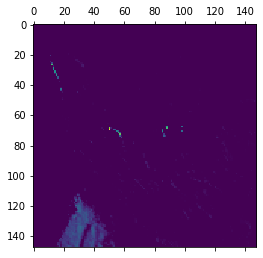

In [25]:
import matplotlib.pyplot as plt

# you may change the number 20 to any int between 0-31 to see different channels of the first activation layer

plt.matshow(first_layer_activation[0, :, :, 24], cmap='viridis')
plt.show()

# each of these channels show a different feature extracted from the image by our model

# Full Visualization of layers

let's go and plot a complete visualization of all the activations in the network. We'll extract and plot every channel in each of our 8 activation maps, and we will stack the results in one big image tensor, with channels stacked side by side.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


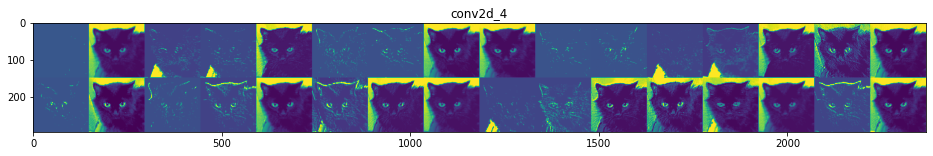

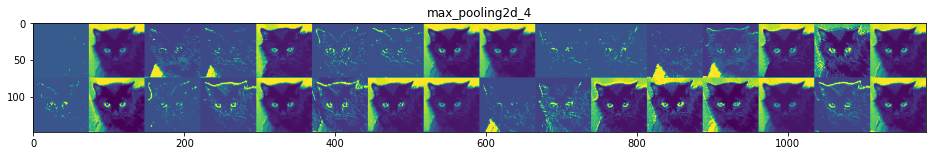

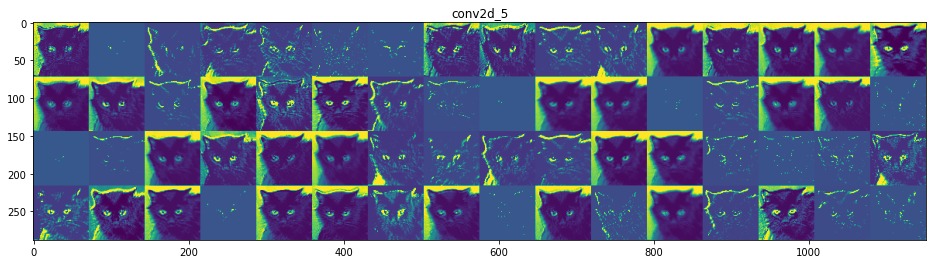

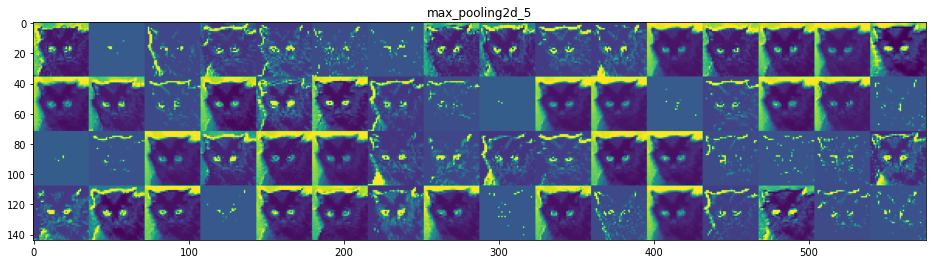

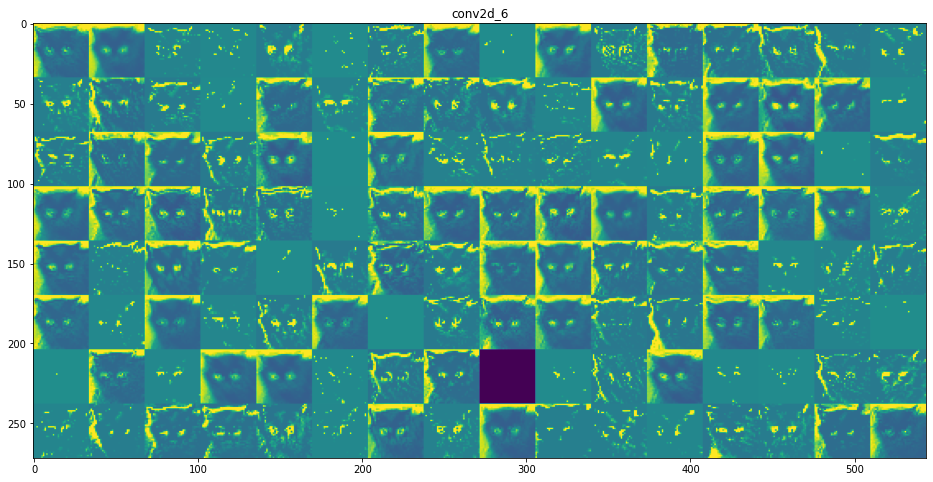

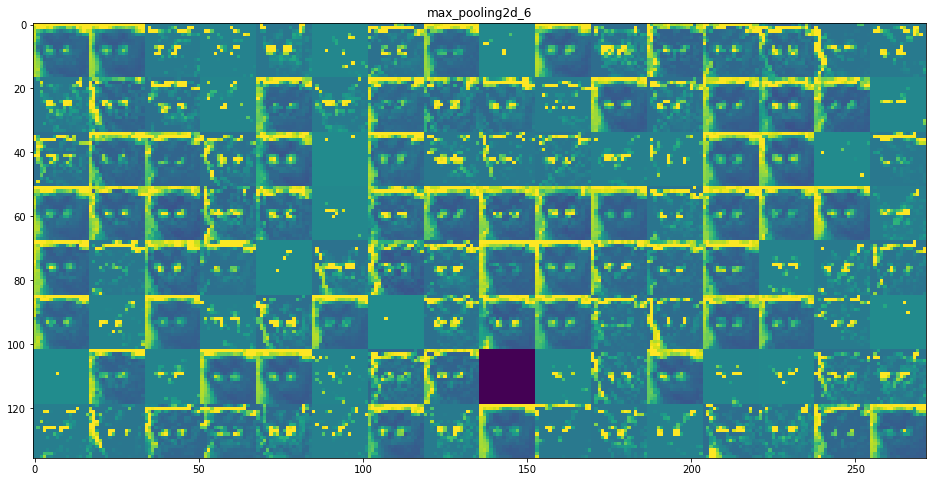

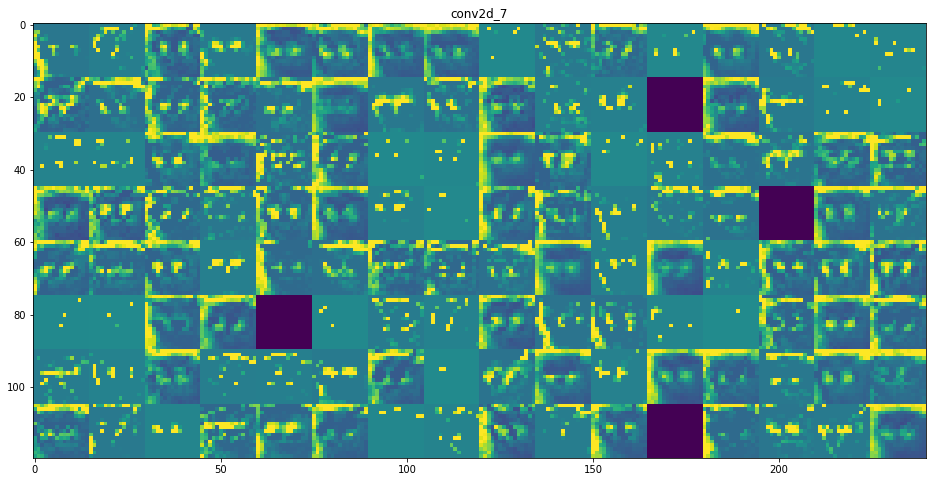

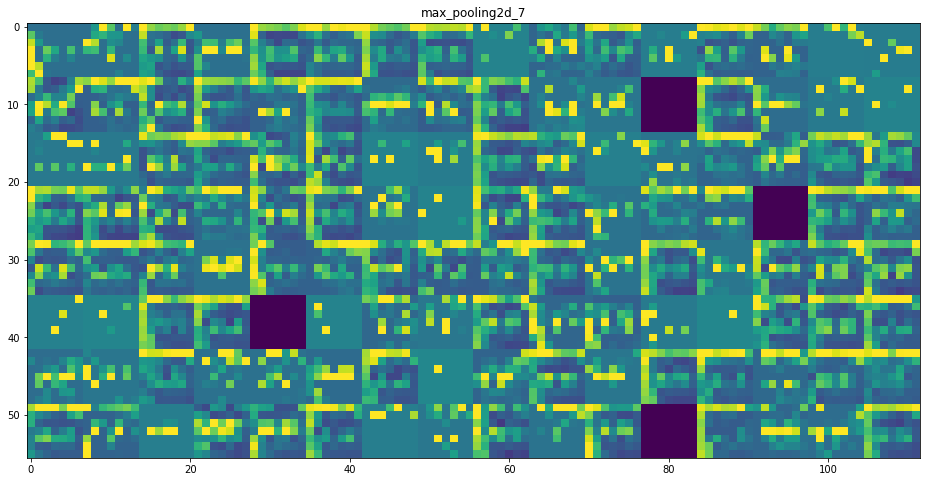

In [26]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

    
plt.show()

# Ploting the model perfomance

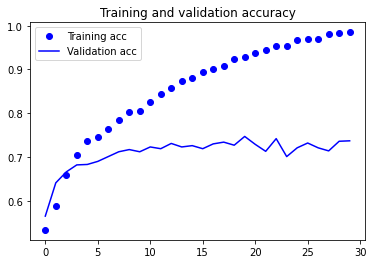

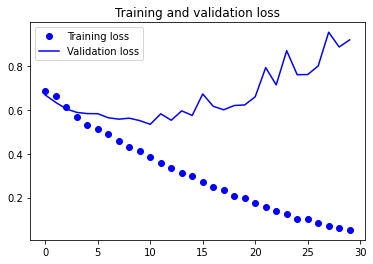

In [27]:
## Ploting accuracy and loss of Validation and Training sets 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()




# OVER FITTING #

# we may add such layers in between different layers of the neural nets
#. model.add(Dropout(0.5))


## Because we only have relatively few training samples (2000),
# overfitting is going to be our number one concern. You already know about a
# number of techniques that can help mitigate overfitting, such as dropout and 
#weight decay (L2 regularization). We are now going to introduce a new one, 
#specific to computer vision, and used almost universally when processing 
#images with deep learning models: data augmentation.


#Using data augmentation to lower the overfitting (by rescaling data)

# Data augmentation = is a processing in which we artifically increase our sample size
# by altering our images, for example by rotating or flipping them.

##################################################
########### USING DATA AUGMETATION ##########
##################################################

#rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures.
#width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
#shear_range is for randomly applying shearing transformations.
#zoom_range is for randomly zooming inside pictures.
#horizontal_flip is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures).
#fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [28]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [29]:
fnames[3]

'dog.1503.jpg'

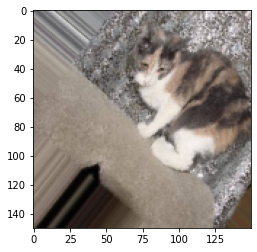

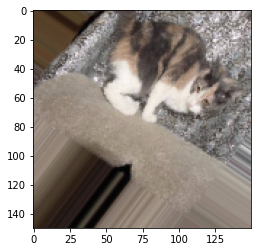

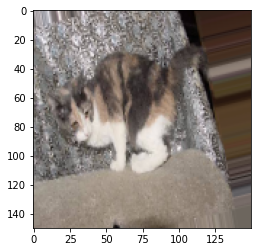

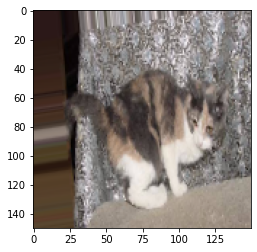

In [30]:
## LOOKING AT AUGMENTED

# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


In [ ]:
# As we can see, with data augmentation we can create several training images from each original image

In [32]:

# Now let's train a new model with our augmented data, 
# and see if augmentation has improved the model performance.


##################################################
            # Creating new a model #
##################################################


model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [33]:
## Applying the agumenation made using the datagen Object

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
##### As it is going to be used as the test data to evaluate the trained model #####
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

##### Validation set however is fed along the training data to the model for fitting an training the model accuretly ####
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
## Model fitting 
if not use_saved_model:

  history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)
  
else:
    !cp /content/drive/MyDrive/labs_content/lab7/history2.json .
    import json
    with open('history2.json') as f:
      history = type('',(),{'history':json.load(f)})

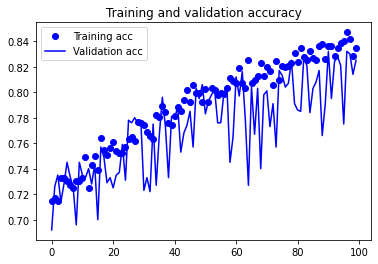

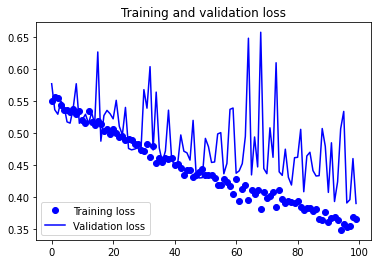

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#Thanks to data augmentation and dropout, we are no longer overfitting: the training curves
# are rather closely tracking the validation curves. We are now able to reach an accuracy 
#of 82%, a 15% relative improvement over the non-regularized model.

# Lab Questions
---

**1. Given that the following numbers refer to the size of our datasets for a binary classification problem, 
is classification accuracy a precise measure of succes?. Explain your answer** (1 mark) 



*   training cat = 1000
*   training dog = 1600
*   test cat = 100
*   test dog = 700 
*   validation cat = 300
*   validation dog = 500




I say yes it is. The number of samples for the dog an cat category may differ but because in the validation sample we have a larger number of cats(300) than in the test(100) then we can gauge the performance of our model reliably. I only focus on cat group because in all the sets it is the one with significantly lower values than the dog group.

**2. compute the output size of the convolution using the following kernel:** (1 mark)

*   Tensor size (shape) (width 151 x height 151)
*   Convolution filter size = (5x5)
*   padding = 0
*   strides = 3


hint: Use the formula (( width-Filter + 2^padding ) / stride ) + 1

output width =(( 151 -5 +2^0)/3) +1 =50\\\
output height =(( 151 -5 +2^0)/3) +1 =50\\\
So the size will be 50 * 50 = 2500

**3. For each of the following types of problems, state an appropriate loss function as well as an appropriate activation function for the output layer (there are multiple correct answers)** (2 marks)

* Binary classification
* Multiclass, single-label classification
* Multiclass, multilabel classification
* Regression to arbitrary values
* Regression to values between 0 and 1




1.   Binary classification -> appropriate loss function is binary crossentropy, appropriate activation function is the sigmoid function.
2.   Multiclass single-label calssification an appropriate loss function would be cross-entropy and the activation function is softmax.

3.   Multiclass multilabel classification- the appropriate loss function would be binary cross-entropy and the appropriate activation function is softmax
4. Regression to arbitrary values - appropriate loss function is mean squared error and the activation function is the sigmoid.
5. Regression to values between 0 and 1 - appropriate loss function is mean squared error and the activation function would be relu.





**4. Once you find the issue of the code above, name the parameter that is used by fit_generator to select the number of gradient descent steps for each epoch.** (1 mark)

Steps per epoch

**5. Given that we have 2000 sample data. How many batches of size 20 is needed to go over all the data once?** (1 mark)




2000/20 = 100\\\
100 batches

**6. After training a CNN, These are the plot of our accuracy and loss. By looking at the plots explain whether this model is acceptable or not.** (1 mark)

No, this is not an acceptable model. This is because the scores on the validation tend to be much poorer than those got from the training. Like in the accuracy plot we see that the training accuracy is above 90% and tends towards 100% while the validation accuarcy is at around 70%.
The training loss drops signinficantly from 5 epochs and tends towards 0 at 30 epochs but the validation loss actually starts to increase from epoch 5-30. This is not consistent with how a good model should work.






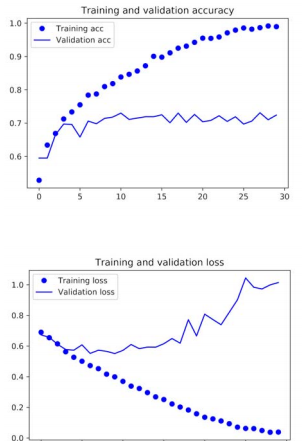

  







**7. Create a model with a single  convolutional layer with 32 nodes, kernel size of 3x3,ReLU activation function and input size of 150x150 with 3 channels. This should be followed by a max-pooling layer (size 5x5), a flatten layer and a 50-node dense layer with a ReLU activation. The model should use sigmoid activation to provide a binary result. Use 7 lines of code.** (3 marks) 


In [37]:

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(5,5))
model.add(layers.Flatten())
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.02),
              metrics=['acc'])

**8. Modify your code in question 7 by adding one/two dropout layers between other layers and report which combination  leads to a better result (Note. A good value for dropout in a hidden layer is between 0.5 and 0.8. Input layers use a larger dropout rate, such as of 0.8. Here you may use 0.5 for both dropouts)** (2 marks)  

Hint: you need to look at the accuracy and loss plots and compare validation values with training.**  


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 26912)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 26912)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                1345650   
____________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
5/5 [==============================] - 5s 878ms/step - loss: 0.9501 - acc: 0.4250 - val_loss: 0.6769 - val_acc: 0.5688
Epoch 2/100
5/5 [==============================] - 4s 782ms/step - loss: 0.7956 - acc: 0.5125 - val_loss: 0.7289 - val_acc: 0.5250
Epoch 3/100
5/5 [==============================] - 4s 762ms/step - loss: 0.7337 - acc: 0.4688 - val_loss: 0.6866 - val_acc: 0.5375
Epoch 4/100
5/5 [==============================] - 4s 778ms/step - loss: 0.6932 - acc: 0.5375 - val_loss: 0.6791 - val_acc: 0.6125
Epoch 5/100
5/5 [==============================] - 4s 781ms/step - loss: 0.6899 - acc: 0.5063 - val_loss: 0.6584 - val_acc: 0.6000
Epoch 6/100
5/5 [==============================] - 4s 730ms/step - loss: 0.6802 - acc: 0.5764 - val_loss: 0.6816 - val_acc: 0.5500
Epoch 7/100
5/5 [==============================] - 4s 724ms/step - loss: 0.6585 - acc: 0.6111 - val_loss: 0.6634 - val_acc: 0.6062
Epoch 8/100
5/5 [==============================] - 4s 778ms/step - loss: 0.6546 - a

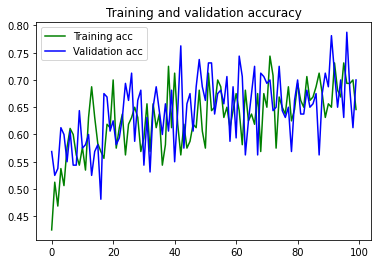

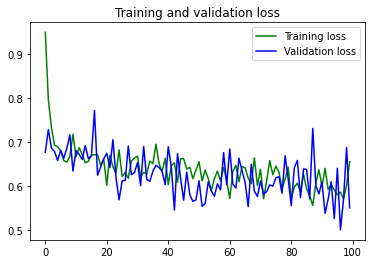

In [38]:
## Provided Functions :
# ploting the Result - You may pass the History (model.fit or model.fit_generator) and it
# will return the resulting Accuracy and Loss as a graph

import keras
from keras import layers
from keras import models

def plotResult(x):

############# Do not change this ##############################################
  import matplotlib.pyplot as plt
  acc = x.history['acc']
  val_acc = x.history['val_acc']
  loss = x.history['loss']
  val_loss = x.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'g', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

plt.show()


def prePross():


  from keras.preprocessing.image import ImageDataGenerator

  # All images will be rescaled by 1.0/255
  train_datagen = ImageDataGenerator(rescale=1.0/255)
  test_datagen = ImageDataGenerator(rescale=1.0/255)

  train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=5,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

  validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='binary')

prePross()
################################################################################

############# STUDENT TASK : Add dropouts to the CNN model ####################

## Use this space to add your model from question 8 ##
model2 = models.Sequential()
model2.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model2.add(layers.Dropout(0.2))
model2.add(layers.MaxPooling2D(5,5))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(50,activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(1,activation='sigmoid'))

################################################################################

############# Do not change this ##############################################
# Compiles
model2.summary()

# Chooses optimizer
from keras import optimizers

model.compile(loss='binary_crossentropy',
             #optimizer=optimizers.RMSprop(lr=1e-4),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['acc'])

# Trains the model

history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=5)

plotResult(history)

################################################################################


**8b. What does compiler do?** (1 mark)

A compiler compiles all the layers used to build the model. It also allows us to give our model the loss function upon which to learn from and improve performance.The compiler is also used to provide a metric for measuring performance of the model

#Visualization Exercise : 

**9. In one of the sections above called (FULL VISUALIZATION OF LAYERS) we ploted what each of our top 8 layers of neural network learn. Briefly explain what is the main difference between representaion of conv2d_1 , and conv2d_3 layers.**(hint: simply look at them and write what each of these layers represent) (1 Mark)


The different representations of conv2d_1 to n first observation is that the number of image representations increases as the value of n increases. As this happens, the clarity in images is seen to be less interprettable by the human eye as if there has been dilution as the images are increased.